# Dataset visualization

### Nececary imports

In [1]:
from ipynb.fs.full.Utils import load_dataset, scale_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Reading the data

In [2]:
df = load_dataset(split=False)

### Attributes

In [3]:
df.keys()

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'category', 'A', 'A#', 'B', 'C', 'C#',
       'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype='object')

In [4]:
df.shape

(20653, 25)

### Overview

In [5]:
df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0.901,0.522,-8.304,1,0.3300,0.01140,0.00000,0.259,0.329,104.053,...,0,0,0,1,0,0,0,0,0,0
1,0.834,0.730,-3.714,1,0.2220,0.00513,0.00000,0.124,0.446,155.008,...,0,0,0,0,0,0,0,0,0,1
3,0.876,0.786,-4.884,0,0.3060,0.06270,0.00000,0.127,0.575,153.068,...,0,0,0,0,0,0,0,0,0,0
4,0.900,0.653,-6.962,0,0.2890,0.09450,0.00000,0.528,0.399,112.503,...,0,0,1,0,0,0,0,0,0,0
5,0.738,0.629,-4.882,0,0.0495,0.26800,0.00114,0.163,0.319,146.067,...,0,0,0,0,0,0,0,1,0,0


### Attribute value distributions

In [6]:
s = ''
for category in df.category.unique():
    s += "%25s | %5d\n" % (category, int(df[df.category == category].shape[0]))
print(s)

                   hiphop |   917
                    chill |  6446
                classical |  6446
                    party |   527
                  workout |   600
                      pop |   105
                     rock |   887
                    metal |   750
                    latin |   556
                  country |   771
                indie_alt |   768
                     punk |   704
                     jazz |   688
                      rnb |   488



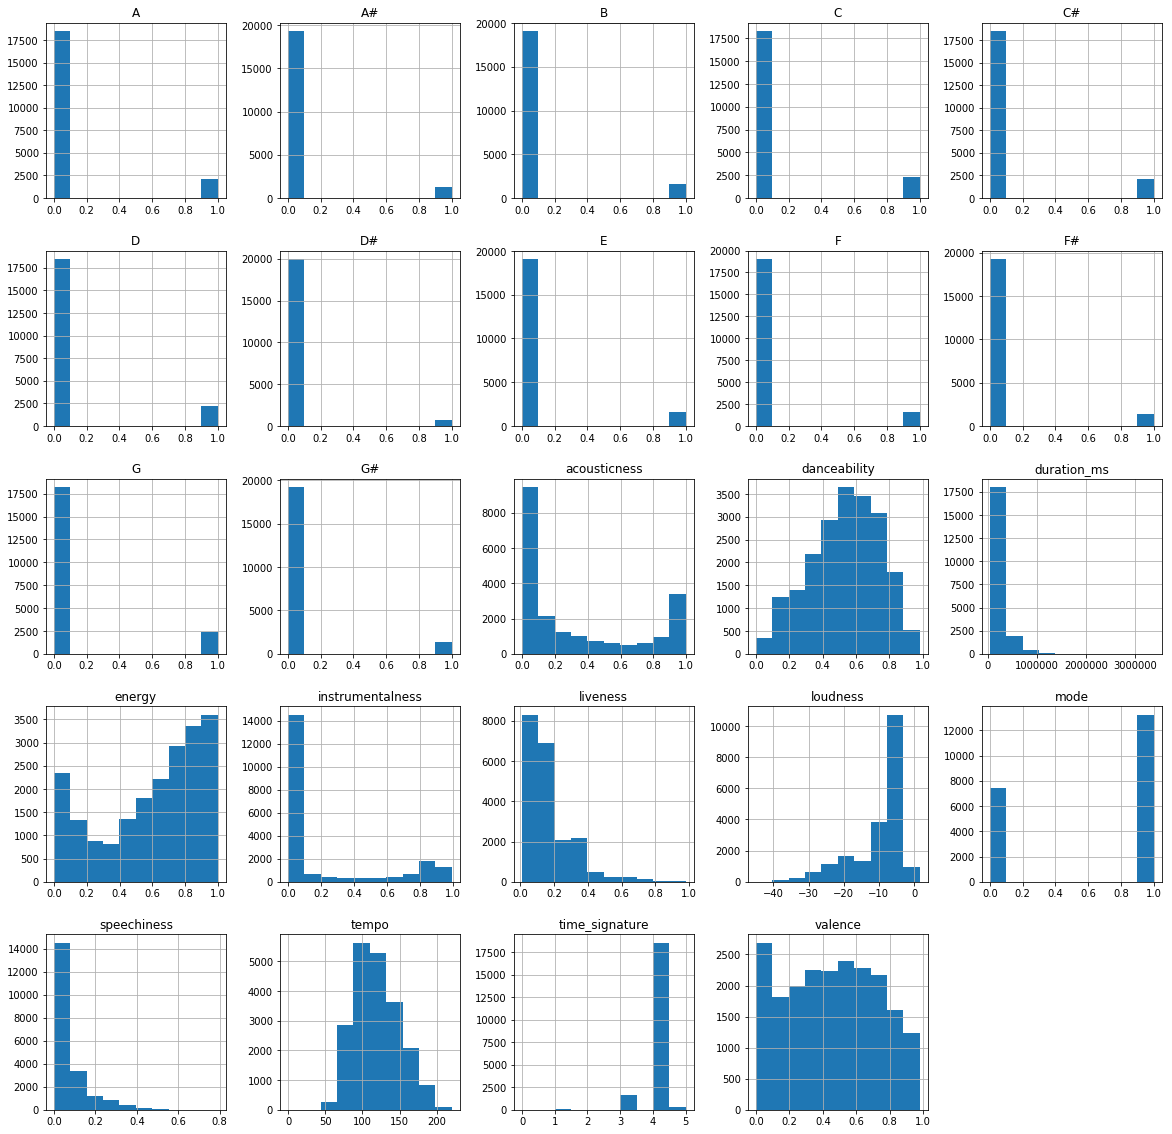

In [7]:
pd.DataFrame.hist(df, figsize=[20,20]);

In [8]:
maxv = df.max(axis=0)
maxv = maxv.drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])
minv = df.min(axis=0)
minv = minv.drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])

s = ''
for k in maxv.keys():
    s += "%25s | min: %15.5f | max: %15.5f\n" % (k, float(minv[k]), float(maxv[k]))
print(s)

             danceability | min:         0.00000 | max:         0.98100
                   energy | min:         0.00021 | max:         0.99900
                 loudness | min:       -44.92000 | max:         1.58500
              speechiness | min:         0.00000 | max:         0.79100
             acousticness | min:         0.00000 | max:         0.99600
         instrumentalness | min:         0.00000 | max:         0.99300
                 liveness | min:         0.01090 | max:         0.97900
                  valence | min:         0.00000 | max:         0.97900
                    tempo | min:         0.00000 | max:       220.01800
              duration_ms | min:     41667.00000 | max:   3383971.00000



### Null values

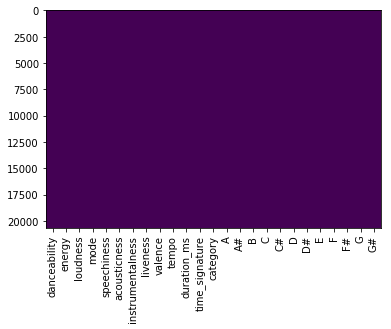

In [9]:
number_of_columns = df.shape[1]
plt.xticks(range(0, number_of_columns), df.columns, rotation='vertical')
plt.imshow(df.isnull(), cmap='viridis', aspect='auto')

### Data relations

#### Energy vs. Loudness

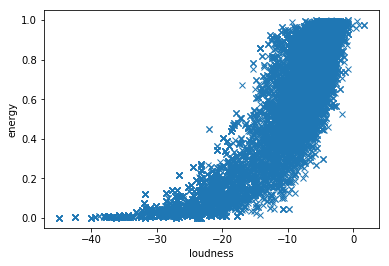

In [10]:
plt.xlabel('loudness')
plt.ylabel('energy')
plt.plot(df['loudness'], df['energy'], 'x')

#### Loudness vs. tempo

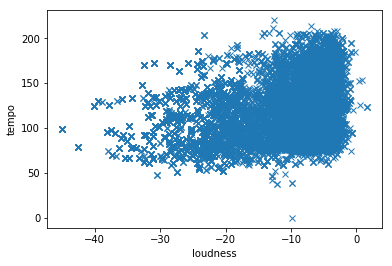

In [11]:
plt.xlabel('loudness')
plt.ylabel('tempo')
plt.plot(df['loudness'], df['tempo'], 'x')

#### Polularity vs. valence

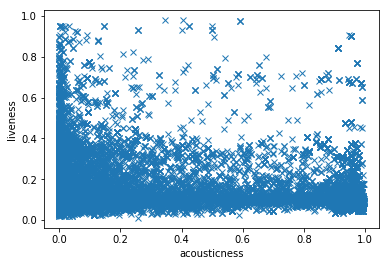

In [12]:
plt.xlabel('acousticness')
plt.ylabel('liveness')
plt.plot(df['acousticness'], df['liveness'], 'x')

#### Danceability vs. valence

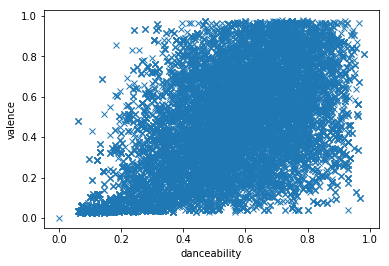

In [13]:
plt.xlabel('danceability')
plt.ylabel('valence')
plt.plot(df['danceability'], df['valence'], 'x')

### 